In [3]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


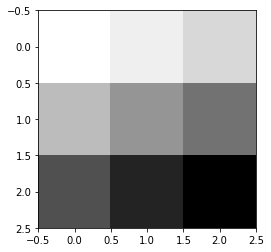

In [4]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32) #(1,3,3,1)형태의 배열임
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
sess.close()

In [25]:
node_1 = tf.constant(3.0, shape=[3,2])
print(node_1)
node_2 = tf.constant([1,2,3,4,5])
print(node_2)

Tensor("Const_36:0", shape=(3, 2), dtype=float32)
Tensor("Const_37:0", shape=(5,), dtype=int32)


In [22]:
node_1 = tf.constant(3.0, tf.float32) #명시적
node_2 = tf.constant(4.0) #암묵적
node_3 = tf.add(node_1, node_2)

print(node_1)
print(node_2)

Tensor("Const_30:0", shape=(), dtype=float32)
Tensor("Const_31:0", shape=(), dtype=float32)


In [4]:
sess = tf.Session() #세션 만들기

print(node_3)
print('node_3 :', sess.run(node_3))

sess.close()

Tensor("Add:0", shape=(), dtype=float32)
node_3 : 7.0


In [5]:
sess = tf.Session()
print(sess.run(node_3))
sess.close()

7.0


(1, 3, 3, 1)


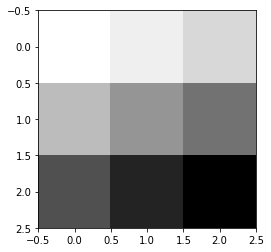

In [6]:
sess=tf.InteractiveSession()
image=np.array([[[[1],[2],[3]],
               [[4],[5],[6]],
               [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[ 81.  99. 117.]
 [207. 225. 243.]
 [333. 351. 369.]]


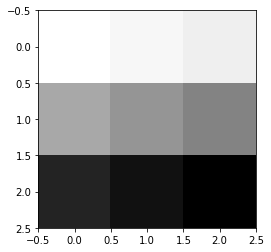

In [7]:
sess=tf.InteractiveSession()
image=np.arange(1,50, dtype=np.float32).reshape(1,7,7,1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3,3,1,1))
conv2d=tf.nn.conv2d(input=image, filter=w_filter, strides=[1,2,2,1], padding='VALID')
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img.reshape(3,3))
plt.imshow(conv2d_img.reshape(3,3),cmap="Greys")

In [ ]:
#padding

In [26]:
sess = tf.InteractiveSession()

image = np.arange(1, 10 , dtype=np.float32).reshape(1,3,3,1)
w_filter = tf.constant(np.ones(4, dtype=np.float32).reshape(2,2,1,1))
conv2d_1 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1], padding="VALID")
conv2d_2 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1], padding="SAME")
print(conv2d_1.eval().reshape(2,2))
print(conv2d_2.eval().reshape(3,3))

sess.close()

[[12. 16.]
 [24. 28.]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


In [28]:
sess = tf.InteractiveSession()

image = np.ones(25, dtype=np.float32).reshape(1, 5, 5, 1)
w_filter = tf.constant(np.ones(9, dtype=np.float32).reshape(3,3,1,1))

conv2d_2 = tf.nn.conv2d(input=image, filter=w_filter, strides=[1,1,1,1], padding='SAME')
print(conv2d_2.eval().reshape(5,5))

sess.close()

[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]]


In [ ]:
#Pooling

In [10]:
sess = tf.InteractiveSession()

image = np.arange(1,17 , dtype=np.float32).reshape(1,4,4,1)
max_pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
avg_pool = tf.nn.avg_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

print(max_pool.eval().shape)
print(max_pool.eval().reshape(2,2))
print(avg_pool.eval().reshape(2,2))

(1, 2, 2, 1)
[[ 6.  8.]
 [14. 16.]]
[[ 3.5  5.5]
 [11.5 13.5]]


In [11]:
#불필요한 warning 끔

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


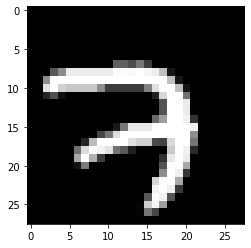

In [13]:
img = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img, cmap='gray')

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_2:0", shape=(1, 14, 14, 5), dtype=float32)


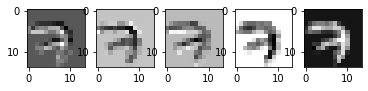

In [14]:
sess = tf.InteractiveSession()

img = img.reshape(1,28,28,1)
#w_filter = np.random.random((3,3,1,5)) #필터의 개수를 항상 1이었다가 5로 바꿔서 swapaxes가 필요해짐
w_filter = np.random.random((3,3,1,5)) -0.5 # 마이너스인 값들이 생겨나면서 필터 후 이미지가 달라짐
conv2d=tf.nn.conv2d(img, w_filter, strides=[1,2,2,1], padding='SAME')
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0 ,3)
# print(np.swapaxes(conv2d_img, 0, 3))
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

sess.close()

In [15]:
from PIL import Image as Im #png 파일 돌아가는 거
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lena = Im.open("C:/Users/Affinity/lena.jpg")
print(Lena.size) #이미지 크기 출력 512X512
Lena.show() #이미지 보기 새창이 켜짐 
Lena = Lena.resize((200,200)) #크기를 200x200으로 알아야 할 수 있어서
Lena = Lena.convert('L') #흑백화면으로 channel이 하나밖에 없는 greyscale
Lena = np.array(Lena, dtype=np.float32) #행렬로 바꿔줌 float32
Lena = Lena.reshape(1,200,200,1) #conv2d에 넣을 모양으로
Lena.shape #[1,200,200,1] = [batch, ht, wdth, channel수]
K1 = tf.constant([[[[-1.]],[[-1.]],[[-1.]]],[[[-1.]],[[9.]],[[-1.]]],[[[-1.]],[[-1.]],[[-1.]]]]) #K1 size=(3,3,1,1)=[ht, wdth, channel, 개수]ㅊ
a1 = tf.nn.conv2d(Lena, K1, strides=[1,1,1,1], padding='VALID')

#실행
sess= tf.Session()
a1=sess.run(a1)
a1.shape #=[1,198, 198, 1]=[channel수, ht, wdth, batch]
a1_img = np.swapaxes(a1, 0,3) #똑같이 1 이여도 꼭 해줘야함. 앞에 먼저 batch가 나와야되서 바꿔줘야함.
a1_img.shape #axis0과 3을 서로 바꾸기 
#=> [1,198,198,1] = [batch, ht, wdth, channel수]

(512, 512)


(1, 198, 198, 1)

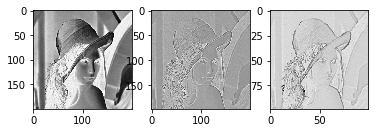

In [16]:
#최대값 풀링 2
h1 =tf.nn.max_pool(a1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

h1=sess.run(h1)
h1.shape #[1, 199, 199, 1] =[batch, ht, wdth, channel수]
plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200,200), cmap="Greys")
plt.subplot(1,3,2)
plt.imshow(a1_img.reshape(198,198), cmap='Greys')
plt.subplot(1,3,3)
plt.imshow(h1.reshape(99,99), cmap="Greys")

In [17]:
sess = tf.InteractiveSession()

image = np.arange(1,10, dtype = np.float32).reshape(1,3,3,1)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3], dtype=np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter, 0,2)
w_filter = np.swapaxes(w_filter, 1,3)

conv2d=tf.nn.conv2d(input = image, filter = w_filter, strides=[1,1,1,1], padding='SAME')
conv2d_img=conv2d.eval()
conv2d_img=np.swapaxes(conv2d_img, 0, 3).reshape(3,3,3)
print("conv2d_img.shape", conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]
